<a href="https://colab.research.google.com/github/HoanDiep/BT11_tuan12/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import drive
#drive.mount('/content/drive')

In [2]:

from keras.datasets import cifar100
from keras.models import Sequential
import matplotlib.pyplot as plt

(x_train, y_train) ,(x_test, y_test) = cifar100.load_data()

In [3]:
x_train.shape


(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train = x_train.reshape(50000, 32, 32, 3)
x_test = x_test.reshape(10000, 32, 32, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

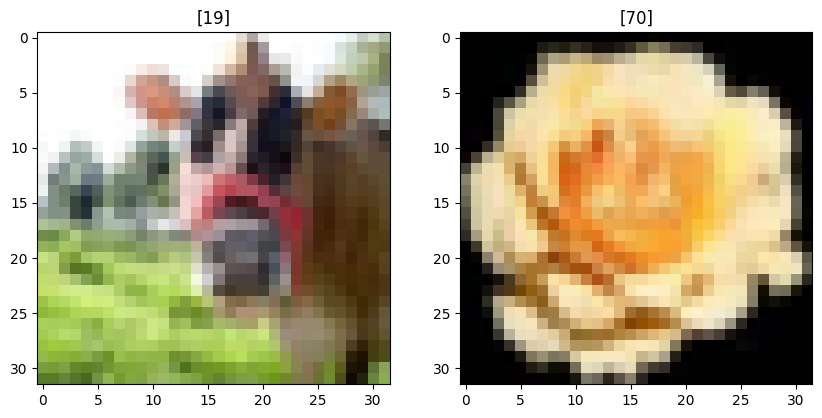

In [6]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(x_train[0], cmap='gray')
plt.title("{}".format(y_train[0]))
plt.subplot(122)
plt.imshow(x_test[20], cmap='gray')
plt.title("{}".format(y_test[20]))
plt.show()

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [9]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
import pandas as pd
train = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1)
#train = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1)
#pd.DataFrame(train.history).plot(figure.figsize(8,5))
#plt.grid(True)
#plt.gca().set_ylim(0,1)

Epoch 1/100
1563/1563 [==============================] - 19s 7ms/step - loss: 4.0819 - accuracy: 0.0723
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 3.5363 - accuracy: 0.1552
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 3.2817 - accuracy: 0.2028
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 3.1229 - accuracy: 0.2320
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9928 - accuracy: 0.2529
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9185 - accuracy: 0.2693
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 2.8508 - accuracy: 0.2832
Epoch 8/100
1563/1563 [==============================] - 14s 9ms/step - loss: 2.7971 - accuracy: 0.2940
Epoch 9/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.7433 - accuracy: 0.3051
Epoch 10/100
1563/1563 [==============================] - 8s 5ms/step -

In [11]:
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss:',test_loss)

313/313 [==============================] - 2s 4ms/step - loss: 2.2267 - accuracy: 0.4225
test_acc: 0.42250001430511475
test_loss: 2.2266950607299805


In [12]:
model.save('/content/drive/My Drive/Colab Notebooks/cifar100_CNN.h5')